In [66]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
plt.rcParams['figure.figsize'] = [10, 10]

base_path = '/home/turbotage/Documents/4DRecon/results/'

In [93]:
def method_str(w, l, error_type, start_method, iter=149):
    return error_type + f'w{w:.3e}_l{l:.3e}_i{iter}_{start_method}.npy'

def get_curves(wexponents, lambdas, error_type, start_methods=['mean', 'diff', 'zero'], iter=149, offset=0, stop=None):

    if stop is None:
        stop = iter

    labels = []
    curves = []

    for w in wexponents:
        for l in lambdas:
            
            if 'mean' in start_methods:
                labels.append(f"p={w:.3e}, lambda={l:.3e}, mean")
                curve = np.load(base_path + method_str(w, l, error_type, 'mean', iter))
                curves.append(curve[offset:stop])

            if 'diff' in start_methods:
                labels.append(f'p={w:.3e}, lambda={l:.3e}, diff')
                curve = np.load(base_path + method_str(w, l, error_type, 'diff', iter))
                curves.append(curve[offset:stop])

            if 'zero' in start_methods:
                labels.append(f'p={w:.3e}, lambda={l:.3e}, zero')
                curve = np.load(base_path + method_str(w, l, error_type, 'zero', iter))
                curves.append(curve[offset:stop])

    return curves, labels

def get_curves2(dicts, err_type, iter=149, offset=0, stop=None):
    labels = []
    curves = []

    if stop is None:
        stop = iter

    for key in dicts.keys():
        wexp = dicts[key]['w']
        lambdas = dicts[key]['l']
        for w in wexp:
            for l in lambdas:
                labels.append(f'p={w:.3e}, lambda={l:.3e}, {key}')
                curve = np.load(base_path + method_str(w, l, err_type, key, iter))
                curves.append(curve[offset:stop])

    return curves, labels

def plot_curves(curves, labels, title=''):
    colors = cm.viridis(np.linspace(0, 0.8, len(curves)))
    linestyles=['solid', 'dashed', 'dashdot', 'dotted']
    x = np.arange(len(curves[0]))
    for i, curve in enumerate(curves):
        if curve.shape[0] != x.shape[0]:
            raise ValueError(f'curve {i} has wrong shape {curve.shape[0]}')
        plt.plot(x, curve, color=colors[i], label=labels[i], linestyle=linestyles[i%len(linestyles)])
    plt.legend()
    plt.title(title)
    plt.show()


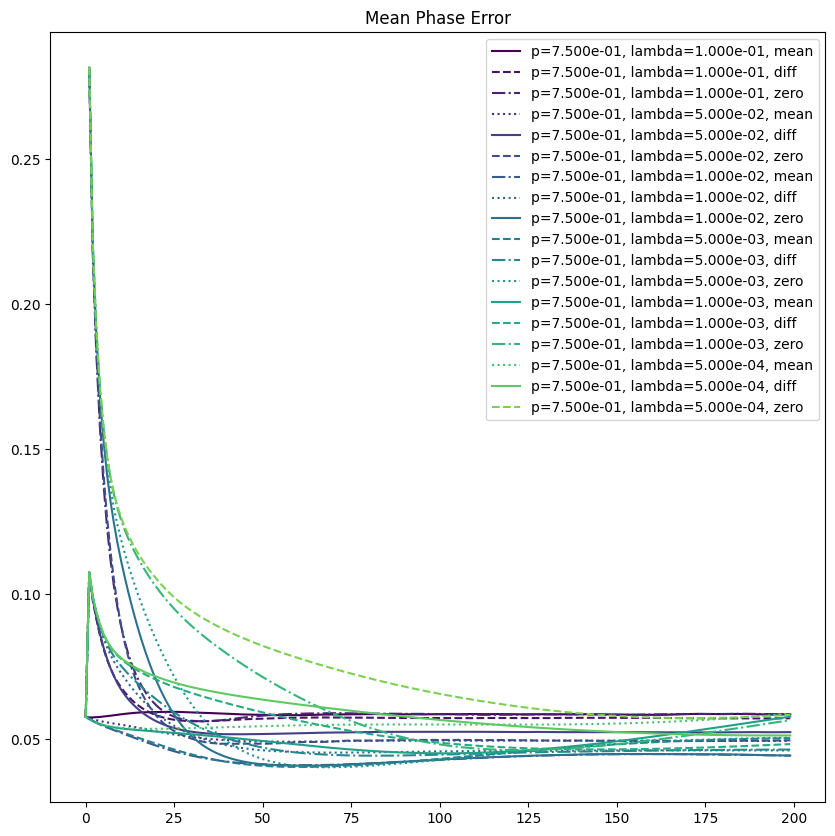

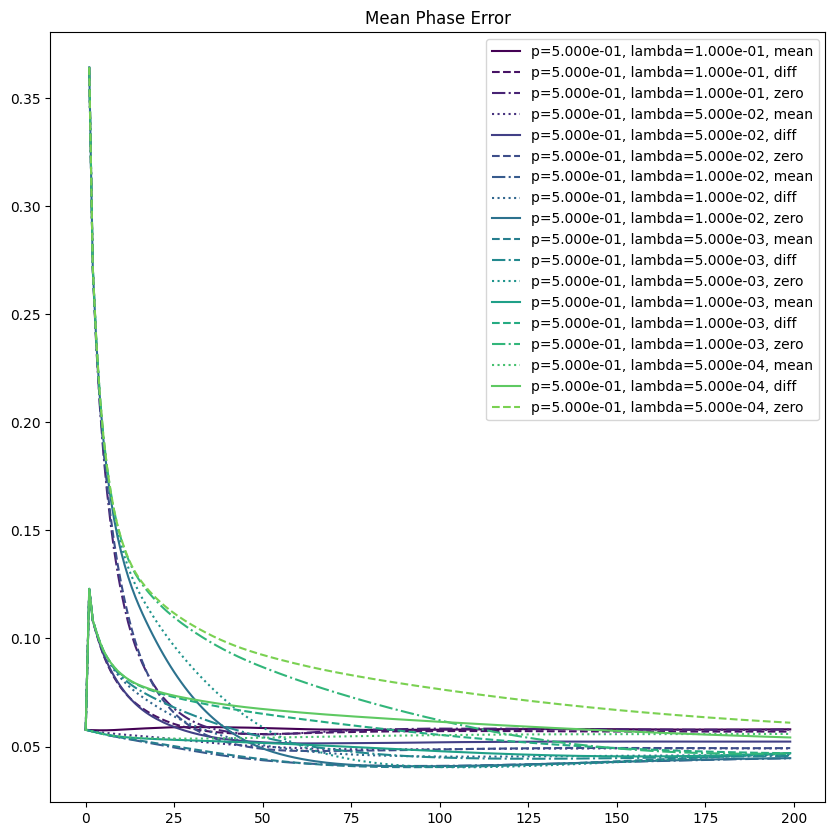

In [111]:

curves, labels = get_curves([0.75], [1e-1, 5e-2, 1e-2, 5e-3, 1e-3, 5e-4], 'err_phase_mean_', ['mean', 'diff', 'zero'], 199, 0, 200)
plot_curves(curves, labels, 'Mean Phase Error')

curves, labels = get_curves([0.5], [1e-1, 5e-2, 1e-2, 5e-3, 1e-3, 5e-4], 'err_phase_mean_', ['mean', 'diff', 'zero'], 199, 0, 200)
plot_curves(curves, labels, 'Mean Phase Error')



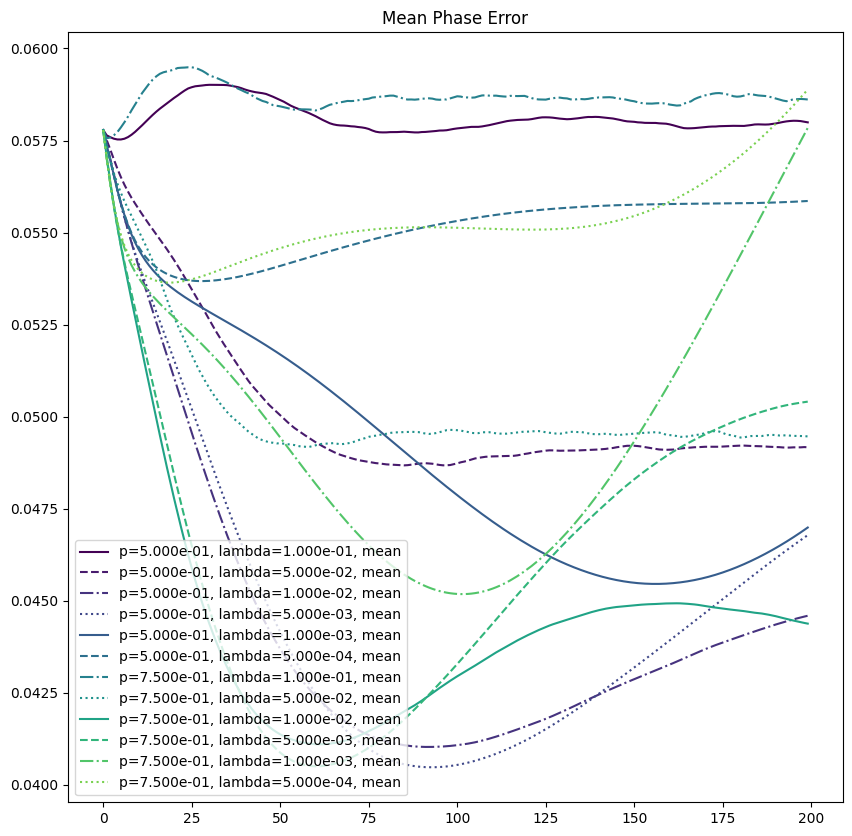

In [113]:
curves, labels = get_curves([0.5, 0.75], [1e-1, 5e-2, 1e-2, 5e-3, 1e-3, 5e-4], 'err_phase_mean_', ['mean'], 199, 0, 200)
plot_curves(curves, labels, 'Mean Phase Error')


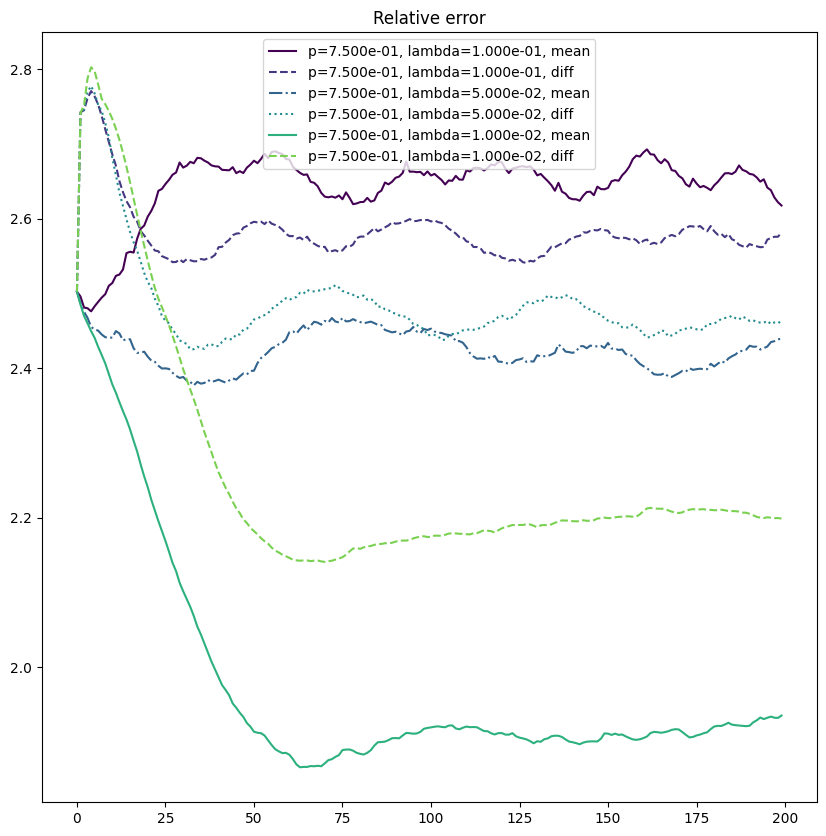

In [72]:
curves, labels = get_curves([0.75], [1e-1, 5e-2, 1e-2], 'err_max_', ['mean', 'diff'], 199, 0, 200)
plot_curves(curves, labels, 'Relative error')

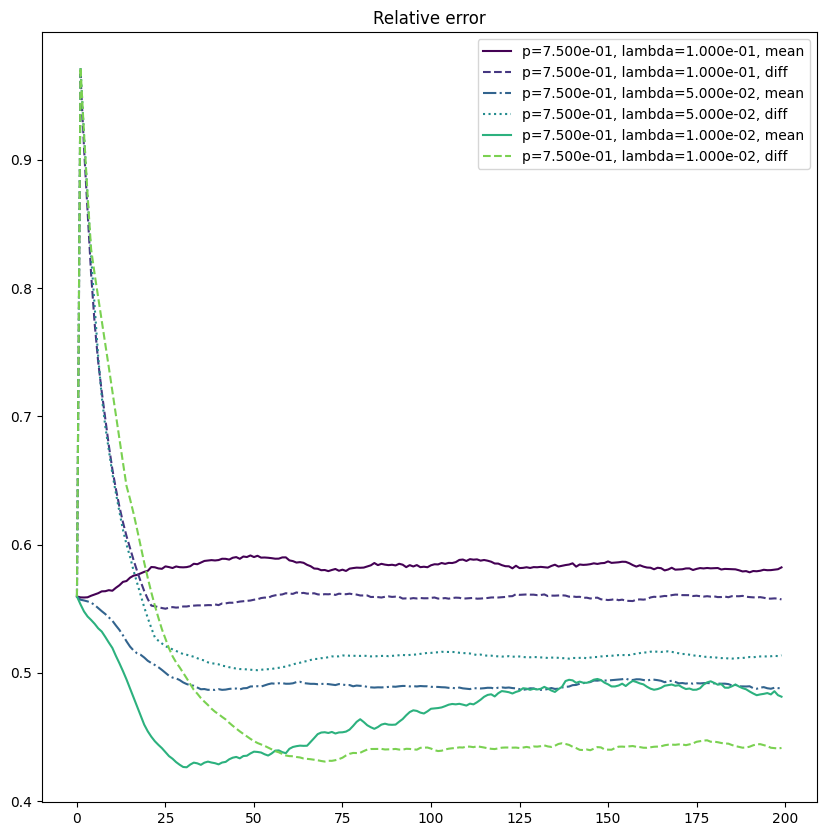

In [73]:
curves, labels = get_curves([0.75], [1e-1, 5e-2, 1e-2], 'err_phase_max_', ['mean', 'diff'], 199, 0, 200)
plot_curves(curves, labels, 'Relative error')

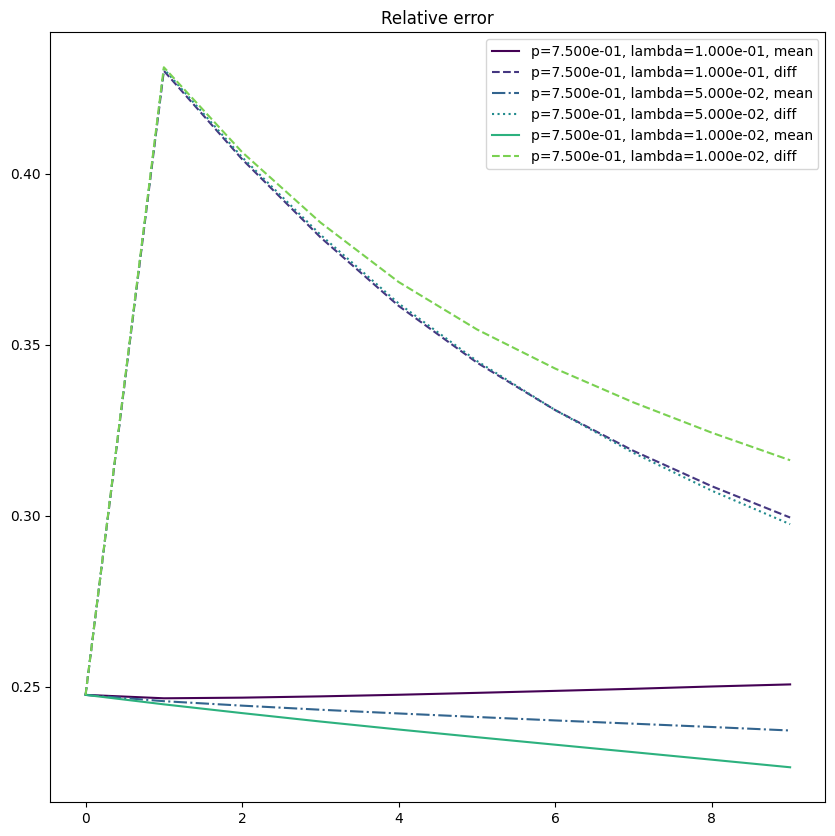

In [75]:
curves, labels = get_curves([0.75], [1e-1, 5e-2, 1e-2], 'err_phase_rel_', ['mean', 'diff'], 199, 0, 10)
plot_curves(curves, labels, 'Relative error')